In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height_weight.csv')
df.head() 



,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


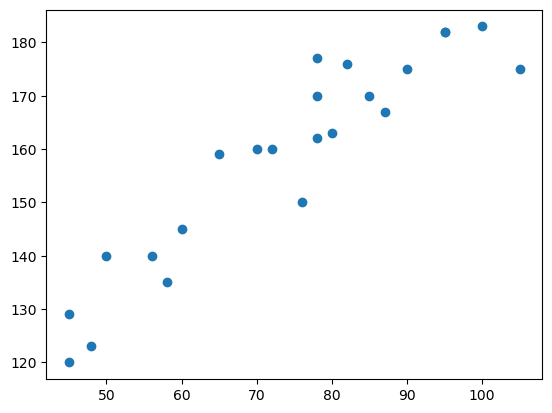

In [3]:
plt.scatter(x=df['Weight'],y=df['Height'])

In [4]:
##correlation
df.corr(method='spearman')



,Weight,Height
Weight,1.000000,0.927917
Height,0.927917,1.000000


In [5]:
df.corr(method='pearson')

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


/Library/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


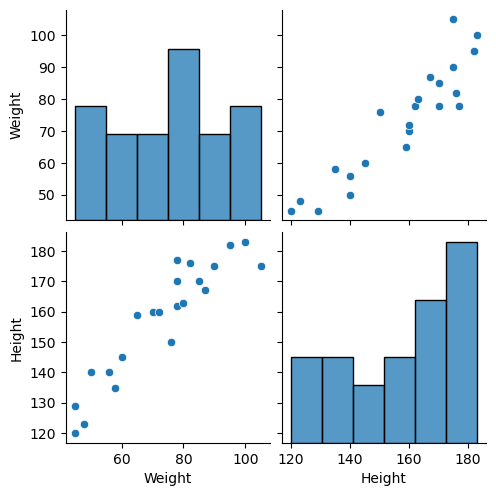

In [6]:
sns.pairplot(df)

In [7]:
##diving features into dependent and independent features
X=df[['Weight']] #independent feature must always in dataframe format [[]]or 2d array
y=df['Height']#dependent

In [8]:
X.head()


,Weight
0,45
1,58
2,48
3,60
4,70


In [9]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)



In [11]:
X_train.shape,y_train.shape

((17, 1), (17,))

In [12]:
X_train,y_train

(    Weight
 1       58
 13     100
 5       78
 2       48
 11      95
 20      45
 3       60
 4       70
 18      76
 16      50
 21      56
 22      72
 7       90
 10      82
 14      85
 19      87
 6       80,
 1     135
 13    183
 5     162
 2     123
 11    182
 20    129
 3     145
 4     160
 18    150
 16    140
 21    140
 22    160
 7     175
 10    176
 14    170
 19    167
 6     163
 Name: Height, dtype: int64)

In [13]:
#standarization:- zscore
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_train


array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [15]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
X_train.shape,X_test.shape
X_train,X_test

(array([[-0.87662801],
        [ 1.66773133],
        [ 0.33497168],
        [-1.48242785],
        [ 1.36483141],
        [-1.6641678 ],
        [-0.75546804],
        [-0.1496682 ],
        [ 0.21381171],
        [-1.36126788],
        [-0.99778797],
        [-0.02850823],
        [ 1.06193149],
        [ 0.57729161],
        [ 0.75903157],
        [ 0.88019153],
        [ 0.45613165]]),
 array([[ 0.33497168],
        [ 0.33497168],
        [-1.6641678 ],
        [ 1.36483141],
        [-0.45256812],
        [ 1.97063125]]))

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [18]:
model.coef_,model.intercept_


(array([17.2982057]), 156.47058823529412)

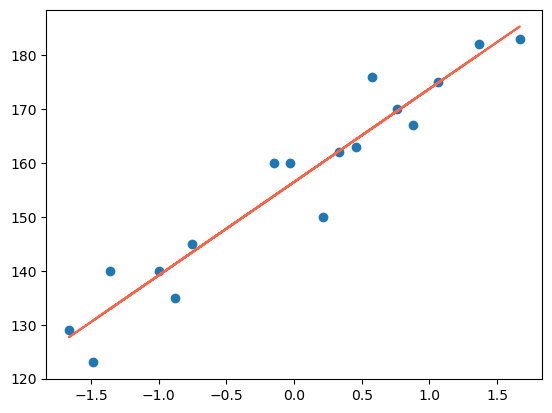

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color='tomato')

In [20]:
#prediction
y_pred=model.predict(X_test)

MAE: 9.66512588679501
MSE: 114.84069295228699
RMSE: 10.716374991212605
R2: 0.7360826717981276


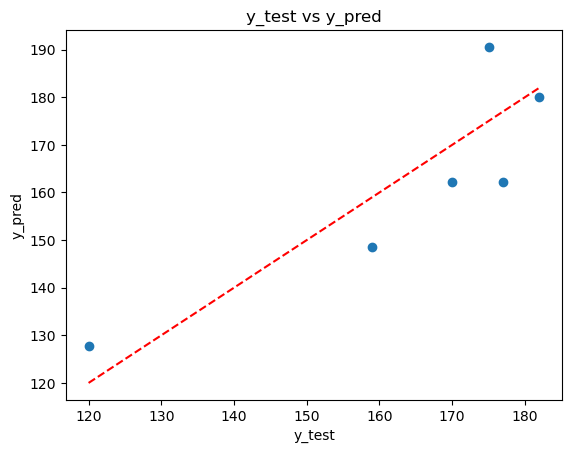

In [21]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',linestyle='--')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()


In [22]:
import statsmodels.api as sm

In [23]:
model = sm.OLS(y_train,X_train).fit()

In [24]:
model

In [25]:
pred = model.predict(X_test)
pred

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [26]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 23 May 2025   Prob (F-statistic):                       0.664
Time:                        12:38:57   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
##predication for new Data
model1.predict(scaler.transform([[10]]))

NameError: name 'model1' is not defined